**# A Time Series Analysis of the Violent Crimes in London Boroughs from 2009 to 2016**
##### This script simply creates a time series gif animation of the violent crimes recorded in London Borougho from 2009 t0 2016.

*   Created by: Boineelo Moyo
*   #30DayMapChallenge 2023

#### You can also open this notebook on google colab [**HERE**](https://colab.research.google.com/drive/1OlRE2f1DSrpKX7tBWypVlZTrVmzYXoyi?usp=sharing)

In [40]:
## 00. INSTALL ALL REQUIRED LIBRARIES
# !pip install pysal
# !pip install seaborn
# !pip install geopandas

In [2]:
# 01. load required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os


In [3]:
# 02. set the filepath and load in a shapefile
fp = "/content/London_Borough_Excluding_MHW.shp"

data = gpd.read_file(fp)

In [ ]:
# 03. Check the shapefile datat
data.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


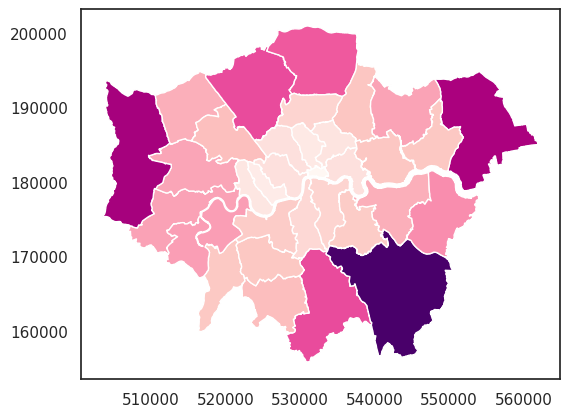

In [4]:
# 04. Specify the color map (cmap) and sPlot the data
cmap = 'RdPu'
sns.set(style="white")

plot = data.plot(column='HECTARES', cmap=cmap, legend=False)
plt.show()


In [8]:
# 05. Load the CSV file into a DataFrame & Display the first few rows of the DataFrame
csv_file = pd.read_csv("/content/MPS_Borough_Level_Crime_Historic.csv", header=0, encoding="utf-8")
csv_file.head()


,borough,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
0,Barking and Dagenham,Burglary,Burglary in a Dwelling,82,71,87,74,74,103,113,...,73,47,77,63,55,54,49,60,73,100
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,59,68,56,53,57,39,44,...,32,42,42,47,32,33,45,40,24,19
2,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,79,52,55,73,63,80,73,...,50,36,58,30,48,38,31,29,32,26
3,Barking and Dagenham,Criminal Damage,Criminal Damage To Motor Vehicle,142,138,118,158,126,96,116,...,73,61,81,73,69,68,61,69,67,59
4,Barking and Dagenham,Criminal Damage,Criminal Damage To Other Building,20,19,20,23,16,12,17,...,21,13,13,18,15,16,11,12,16,8


In [9]:
# 06. filter data, we only want the 'Violence Against the Person' data
violence_filter  = csv_file['major_category'] == 'Violence Against the Person'
violence_data = csv_file[violence_filter]

violence_data.head()

,borough,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
25,Barking and Dagenham,Violence Against the Person,Assault with Injury,180,121,171,164,162,145,175,...,108,100,136,143,146,106,126,104,108,95
26,Barking and Dagenham,Violence Against the Person,Common Assault,99,86,101,85,90,115,100,...,167,134,144,140,161,122,140,116,142,112
27,Barking and Dagenham,Violence Against the Person,Grievous Bodily Harm,0,0,6,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,Barking and Dagenham,Violence Against the Person,Harassment,129,108,115,107,124,150,140,...,186,147,173,166,192,194,145,145,137,145
29,Barking and Dagenham,Violence Against the Person,Murder,0,0,0,1,0,0,0,...,0,0,0,1,0,0,2,0,1,1


In [10]:
# 07. Group data by Borough to get the sum
crime_sum = violence_data.groupby('borough').sum()

crime_sum.head()


<ipython-input-10-18269b19803f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_sum = violence_data.groupby('borough').sum()


,200801,200802,200803,200804,200805,200806,200807,200808,200809,200810,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,449,366,415,415,425,485,485,481,394,392,...,557,475,572,546,617,522,518,447,500,465
Barnet,385,386,413,429,524,475,516,383,383,418,...,576,634,711,677,666,661,658,677,613,598
Bexley,238,301,286,279,294,299,281,265,285,290,...,405,314,369,398,424,342,390,413,411,396
Brent,443,423,504,518,599,550,588,489,518,590,...,684,785,865,839,787,780,768,817,736,777
Bromley,454,413,470,419,473,446,585,469,441,484,...,529,481,569,558,627,523,543,606,559,607


In [11]:
# 08. Melt the DataFrame to tidy format
melted_data = pd.melt(violence_data,  id_vars=['borough','major_category','minor_category'])
melted_data.head()

,borough,major_category,minor_category,variable,value
0,Barking and Dagenham,Violence Against the Person,Assault with Injury,200801,180
1,Barking and Dagenham,Violence Against the Person,Common Assault,200801,99
2,Barking and Dagenham,Violence Against the Person,Grievous Bodily Harm,200801,0
3,Barking and Dagenham,Violence Against the Person,Harassment,200801,129
4,Barking and Dagenham,Violence Against the Person,Murder,200801,0


In [12]:
df_melted = melted_data.groupby('borough').sum()
df_melted.head()

<ipython-input-12-31357089cbd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_melted = melted_data.groupby('borough').sum()


,value
borough,
Barking and Dagenham,44195
Barnet,47586
Bexley,30686
Brent,65867
Bromley,47917


In [13]:
# 09. Pivot the DataFrame to add the column 'major_category' and sum up values for each borough by year
crime_pivot = melted_data.pivot_table(values='value', index=['borough', 'major_category'], columns='variable', aggfunc=np.sum)
crime_pivot.columns = crime_pivot.columns.get_level_values(0)
crime_pivot.head()

,variable,200801,200802,200803,200804,200805,200806,200807,200808,200809,200810,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
borough,major_category,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,Violence Against the Person,449,366,415,415,425,485,485,481,394,392,...,557,475,572,546,617,522,518,447,500,465
Barnet,Violence Against the Person,385,386,413,429,524,475,516,383,383,418,...,576,634,711,677,666,661,658,677,613,598
Bexley,Violence Against the Person,238,301,286,279,294,299,281,265,285,290,...,405,314,369,398,424,342,390,413,411,396
Brent,Violence Against the Person,443,423,504,518,599,550,588,489,518,590,...,684,785,865,839,787,780,768,817,736,777
Bromley,Violence Against the Person,454,413,470,419,473,446,585,469,441,484,...,529,481,569,558,627,523,543,606,559,607


In [14]:
# 10. Now lets join the geo_df with the cleaned data
merged_data = data.set_index('NAME').join(crime_sum)

merged_data = merged_data.reindex(merged_data.index.rename('borough'))

# Print the maximum value in each column
merged_data.max()

<ipython-input-14-34510140cc67>:7: FutureWarning: The default value of numeric_only in GeoDataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.max()


GSS_CODE      E09000033
HECTARES      15013.487
NONLD_AREA      370.619
ONS_INNER             T
SUB_2009           None
                ...    
201608           1006.0
201609            994.0
201610            999.0
201611            926.0
201612           1005.0
Length: 114, dtype: object

In [15]:
# 11. Print the column names in your GeoDataFrame
print(merged_data.columns)


Index(['GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry', '200801', '200802', '200803',
       ...
       '201603', '201604', '201605', '201606', '201607', '201608', '201609',
       '201610', '201611', '201612'],
      dtype='object', length=115)


In [33]:
# 11. Now lets create a list of annual maps that we will later combine into timelapse

def create_and_save_map(data, list_of_years, cmap='RdPu', vmin=200, vmax=1200):
    """
    Create and save choropleth maps for each year in the list.

    Parameters:
    - data: GeoDataFrame containing the spatial data
    - list_of_years: List of years to create maps for
    - cmap: Colormap for the choropleth maps (default is 'Purples')
    - vmin: Minimum value for the color scale (default is 200)
    - vmax: Maximum value for the color scale (default is 1200)
    """

    # Ensure the output path exists
    os.makedirs('charts/maps', exist_ok=True)
    images = [] #lets store our maps in a list

    for year in list_of_years:
        fig, ax = plt.subplots(figsize=(10, 10))
        data.plot(column=year, cmap='RdPu', linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
                  legend=False, norm=plt.Normalize(vmin=vmin, vmax=vmax), ax=ax)

        # Remove axis
        ax.axis('off')

        # Add title
        ax.set_title('Annual Trends of Violent Crimes in London\nBorough: 2009 - 2016',
                     fontdict={'fontsize': '21', 'fontweight': '3'})

        # Create annotation for the year
        only_year = year[:4]
        ax.annotate(only_year,
                    xy=(0.1, .225), xycoords='figure fraction',
                    horizontalalignment='left', verticalalignment='top',
                    fontsize=30)

         # Add custom text at the bottom
        fig.text(0.5, 0.05, '#30DayMapChallenge-2023\n@MapsbyBoi', ha='center', va='center', fontsize=13, color='gray')

            # Create a horizontal color bar
        cax = fig.add_axes([0.1, 0.15, 0.8, 0.03])
        sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm.set_array([])
        cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
        cbar.set_label('No. of Violent Crimes', fontsize=12, labelpad=10)

        # Save the figure as a high-res png
        filepath = os.path.join('charts/maps', f'{only_year}_new_violence.png')
        fig.savefig(filepath, dpi=300)
        plt.close(fig)

    return images


In [34]:
# 12. Specify the GeoDataFrame and other parameters
merged1 = merged_data
list_of_years = ['200807', '200907', '201007', '201107', '201207', '201307', '201407', '201507', '201607']
output_path = 'charts/maps'


In [35]:
# 13. Call the function to create and save the maps
images = create_and_save_map(merged1, list_of_years)
create_and_save_map(merged1, list_of_years, output_path)

[]

In [36]:
# !pip install --upgrade imageio
from PIL import Image
from PIL import Image, ImageSequence


In [38]:
# 14. Now lets merge our images to create a time lapse image.

def create_gif_from_files(file_paths, gif_path, duration=600):
    """
    Create a GIF animation from a list of image file paths.

    Parameters:
    - file_paths: List of file paths for images
    - gif_path: Path to save the GIF
    - duration: Duration of each frame in milliseconds
    """
    images_pil = [Image.open(file_path) for file_path in file_paths]
    images_pil[0].save(
        gif_path,
        save_all=True,
        append_images=images_pil[1:],
        duration=duration,
        loop=0  # 0 means infinite loop
    )

# Specify the list of file paths for the PNG images
png_file_paths = ['charts/maps/2008_new_violence.png',
                  'charts/maps/2009_new_violence.png',
                  'charts/maps/2010_new_violence.png',
                  'charts/maps/2011_new_violence.png',
                  'charts/maps/2012_new_violence.png',
                  'charts/maps/2013_new_violence.png',
                  'charts/maps/2014_new_violence.png',
                  'charts/maps/2015_new_violence.png',
                  'charts/maps/2016_new_violence.png',]

# Specify the path for the GIF
gif_path = 'charts/maps/violence_animation.gif'

# Call the function to create and save the GIF
create_gif_from_files(png_file_paths, gif_path, duration=600)

# VOIIILLLLLAAAA .......................................................................